In [1]:
#imports necessary libraries to do basic things on the dataset
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Reading the Data

In [37]:
data = pd.read_csv('C:/Users/dhawa/OneDrive/Desktop/Projects/Python Projects/survey.csv')
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Finding the missing Values

In [38]:
print(data.isnull().sum())

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


# Different ways of finding the unique values in each column

In [39]:
unique_values_sum_per_column = data.apply(lambda col: col.nunique())

for column_name, unique_values_sum in unique_values_sum_per_column.items():
    print(f"Sum of unique values in {column_name}: {unique_values_sum}")

Sum of unique values in Timestamp: 1246
Sum of unique values in Age: 53
Sum of unique values in Gender: 49
Sum of unique values in Country: 48
Sum of unique values in state: 45
Sum of unique values in self_employed: 2
Sum of unique values in family_history: 2
Sum of unique values in treatment: 2
Sum of unique values in work_interfere: 4
Sum of unique values in no_employees: 6
Sum of unique values in remote_work: 2
Sum of unique values in tech_company: 2
Sum of unique values in benefits: 3
Sum of unique values in care_options: 3
Sum of unique values in wellness_program: 3
Sum of unique values in seek_help: 3
Sum of unique values in anonymity: 3
Sum of unique values in leave: 5
Sum of unique values in mental_health_consequence: 3
Sum of unique values in phys_health_consequence: 3
Sum of unique values in coworkers: 3
Sum of unique values in supervisor: 3
Sum of unique values in mental_health_interview: 3
Sum of unique values in phys_health_interview: 3
Sum of unique values in mental_vs_ph

In [40]:
frame = pd.concat([data.nunique(),data.dtypes], axis = 1)
frame

,0,1
Timestamp,1246,object
Age,53,int64
Gender,49,object
Country,48,object
state,45,object
self_employed,2,object
family_history,2,object
treatment,2,object
work_interfere,4,object
no_employees,6,object


[Text(0, 0, '144'), Text(0, 0, '173'), Text(0, 0, '213'), Text(0, 0, '465')]

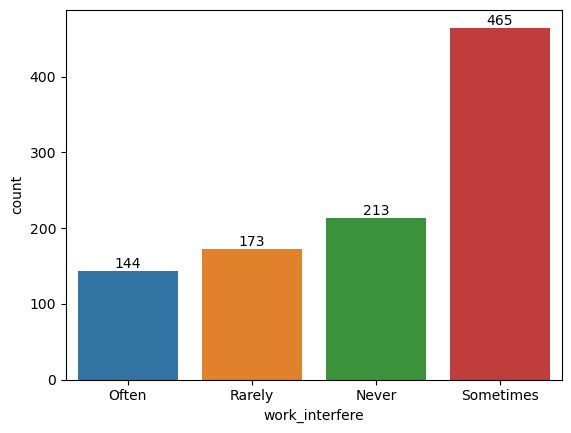

In [41]:
ax = sns.countplot(data = data , x = 'work_interfere')
ax.bar_label(ax.containers[0])

In [42]:
columns_to_drop = ['state', 'Timestamp', 'comments']

data = data.drop(columns_to_drop, axis = 1)

data

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,NaN,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,No,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


# Imputing Null values in the column

In [43]:
from sklearn.impute import SimpleImputer
import numpy as np
# Filling the missing values with the most occured values in the column 'work_interfere' and 'self_employed' column


data['work_interfere'] = np.ravel(SimpleImputer(strategy = 'most_frequent').fit_transform(data['work_interfere'].values.reshape(-1, 1)))
data['self_employed'] = np.ravel(SimpleImputer(strategy = 'most_frequent').fit_transform(data['self_employed'].values.reshape(-1, 1)))

data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


# Cleaning the noisy data

In [44]:
print(data['Gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [45]:
data['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

data['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

print(data['Gender'].unique())

['Female' 'Male' 'Other']


In [46]:
data['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [47]:
data.drop(data[data['Age']<0].index, inplace = True)
data.drop(data[data['Age']>99].index, inplace = True)

print(data['Age'].unique())

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72]


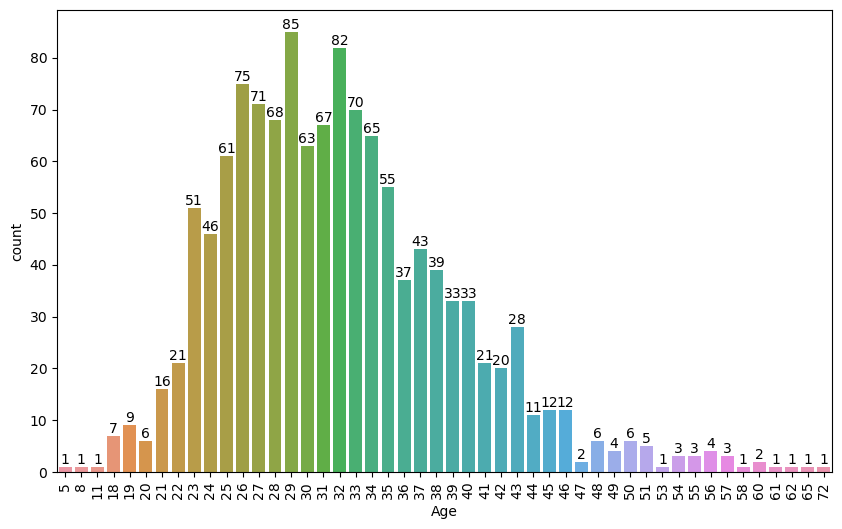

In [48]:
plt.figure(figsize = (10,6))
age_range_plot = sns.countplot(data = data, x = 'Age');
age_range_plot.bar_label(age_range_plot.containers[0]);
plt.xticks(rotation=90);

C:\Users\dhawa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

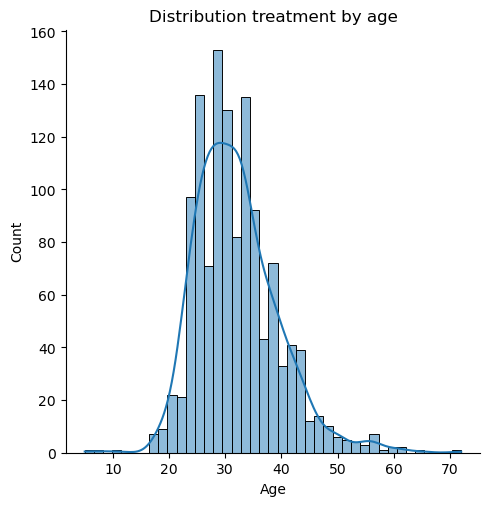

In [49]:
plt.figure(figsize=(10, 6));
sns.displot(data['Age'], kde = 'treatment');
plt.title('Distribution treatment by age');

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1254 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1254 non-null   int64 
 1   Gender                     1254 non-null   object
 2   Country                    1254 non-null   object
 3   self_employed              1254 non-null   object
 4   family_history             1254 non-null   object
 5   treatment                  1254 non-null   object
 6   work_interfere             1254 non-null   object
 7   no_employees               1254 non-null   object
 8   remote_work                1254 non-null   object
 9   tech_company               1254 non-null   object
 10  benefits                   1254 non-null   object
 11  care_options               1254 non-null   object
 12  wellness_program           1254 non-null   object
 13  seek_help                  1254 non-null   object
 14  anonymity    

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#Make the dataset include all the columns we need to change their dtypes
columns_to_encode = ['Gender', 'Country', 'self_employed','family_history', 'treatment', 'work_interfere','no_employees',
                             'remote_work', 'tech_company','benefits','care_options', 'wellness_program',
                             'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence',
                             'coworkers', 'supervisor', 'mental_health_interview','phys_health_interview',
                             'mental_vs_physical', 'obs_consequence']
#Write a Loop for fitting LabelEncoder on columns_to_encode
for columns in columns_to_encode:
    data[columns] = le.fit_transform(data[columns])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1254 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1254 non-null   int64
 1   Gender                     1254 non-null   int32
 2   Country                    1254 non-null   int32
 3   self_employed              1254 non-null   int32
 4   family_history             1254 non-null   int32
 5   treatment                  1254 non-null   int32
 6   work_interfere             1254 non-null   int32
 7   no_employees               1254 non-null   int32
 8   remote_work                1254 non-null   int32
 9   tech_company               1254 non-null   int32
 10  benefits                   1254 non-null   int32
 11  care_options               1254 non-null   int32
 12  wellness_program           1254 non-null   int32
 13  seek_help                  1254 non-null   int32
 14  anonymity                  12

In [52]:
data.describe()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,...,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000
mean,32.019139,0.818182,37.763158,0.114833,0.390750,0.504785,2.127592,2.785486,0.297448,0.819777,...,0.647528,1.409888,0.850877,0.829346,0.972887,1.098884,0.868421,0.716906,0.814992,0.145136
std,7.375005,0.423328,13.338393,0.318947,0.488113,0.500177,1.164651,1.738558,0.457318,0.384527,...,0.908507,1.507978,0.766994,0.485611,0.619630,0.843613,0.425906,0.723840,0.834740,0.352378
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,42.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,31.000000,1.000000,45.000000,0.000000,0.000000,1.000000,3.000000,3.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,36.000000,1.000000,45.000000,0.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000
max,72.000000,2.000000,46.000000,1.000000,1.000000,1.000000,3.000000,5.000000,1.000000,1.000000,...,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [57]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder

data['Age'] = MaxAbsScaler().fit_transform(data[['Age']])
data['Country'] = StandardScaler().fit_transform(data[['Country']])
data['work_interfere'] = StandardScaler().fit_transform(data[['work_interfere']])
data['no_employees'] = StandardScaler().fit_transform(data[['no_employees']])
data['leave'] = StandardScaler().fit_transform(data[['leave']])

data.describe()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1254.000000,1254.000000,1.254000e+03,1254.000000,1254.000000,1254.000000,1.254000e+03,1.254000e+03,1254.000000,1254.000000,...,1254.000000,1.254000e+03,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000
mean,0.444710,0.818182,2.549795e-17,0.114833,0.390750,0.504785,8.499315e-18,-2.266484e-17,0.297448,0.819777,...,0.647528,2.266484e-17,0.850877,0.829346,0.972887,1.098884,0.868421,0.716906,0.814992,0.145136
std,0.102431,0.423328,1.000399e+00,0.318947,0.488113,0.500177,1.000399e+00,1.000399e+00,0.457318,0.384527,...,0.908507,1.000399e+00,0.766994,0.485611,0.619630,0.843613,0.425906,0.723840,0.834740,0.352378
min,0.069444,0.000000,-2.832292e+00,0.000000,0.000000,0.000000,-1.827534e+00,-1.602822e+00,0.000000,0.000000,...,0.000000,-9.353262e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,1.000000,3.177693e-01,0.000000,0.000000,0.000000,-9.685659e-01,-1.027403e+00,0.000000,1.000000,...,0.000000,-9.353262e-01,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.430556,1.000000,5.427737e-01,0.000000,0.000000,1.000000,7.493713e-01,1.234352e-01,0.000000,1.000000,...,0.000000,-2.719217e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,0.500000,1.000000,5.427737e-01,0.000000,1.000000,1.000000,7.493713e-01,6.988541e-01,1.000000,1.000000,...,2.000000,3.914827e-01,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000
max,1.000000,2.000000,6.177752e-01,1.000000,1.000000,1.000000,7.493713e-01,1.274273e+00,1.000000,1.000000,...,2.000000,1.718291e+00,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [58]:
from sklearn.model_selection import train_test_split

#I wanna work on 'treatment' column.
X = data.drop(columns = ['treatment'])
y = data['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(X_train.shape, y_train.shape)
print('-'*30)
print(X_test.shape, y_test.shape)
print('_'*30)

(940, 23) (940,)
------------------------------
(314, 23) (314,)
______________________________


In [59]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier as DT

# Random Forest Classifier

In [60]:
steps_rfc = [('Scaler', StandardScaler()),
             ('clf', RFC(n_estimators = 40))]



clf_rfc = Pipeline(steps=steps_rfc)


clf_rfc.fit(X_train, y_train)

y_pred_rfc = clf_rfc.predict(X_test)
print('RFC accuracy: ', accuracy_score(y_true=y_test, y_pred=y_pred_rfc)*100)

RFC accuracy:  71.97452229299363


# KNN

In [61]:
steps_knn = [('Scaler', StandardScaler()),
             ('clf', KNN(n_neighbors = 5))]



clf_knn = Pipeline(steps=steps_knn)


clf_knn.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_test)
print('KNN accuracy :', accuracy_score(y_true=y_test, y_pred=y_pred_knn)*100)

KNN accuracy : 62.101910828025474


# Support Vector Classifier

In [62]:
steps_svc = [('Scaler', StandardScaler()),
             ('clf', SVC())]



clf_svc = Pipeline(steps=steps_svc)


clf_svc.fit(X_train, y_train)

y_pred_svc = clf_svc.predict(X_test)
print('SVC accuracy :', accuracy_score(y_true=y_test, y_pred=y_pred_svc)*100)

SVC accuracy : 70.70063694267516


# Decision Tree

In [63]:
steps_dt = [('Scaler', StandardScaler()),
             ('clf', DT())]



clf_dt = Pipeline(steps=steps_dt)


clf_dt.fit(X_train, y_train)

y_pred_dt = clf_dt.predict(X_test)
print('DT accuracy :', accuracy_score(y_true=y_test, y_pred=y_pred_dt)*100)

DT accuracy : 64.96815286624204
